## Northwind Shipping Data Analaysis
### A preliminary data analysis was conducted on Northwind Shipping Data
1. Pyscog2 was used to establish a database connection and pull data from a AWS database
2. Pandas were used to explore and described the data
3. Pandas in conjuction with SQL pulls were used to further process the data
4. Pivot tables were created using pandas
5. Data was processed and consilidated
6. Matplotlib was used to create charts and graphs of the data

In [22]:
import psycopg2 #Load Module into current namespace
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline

#define connection string specifing the server, the database, the user and the password
constr =  "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' dbname='northwind' user='dsi_student' password = 'gastudents'"

#Use the connection string to establish a connection to the server. The return type is of type SQLConnection
conn = psycopg2.connect(constr)

#Create a Curser Instance using the connection
cursor = conn.cursor()

#Use the cursor to execute a query
#cursor.execute('SELECT * FROM ORDERS')

#Fetch the results of the query if it exsitst
#records = cursor.fetchall()

#print records

In [12]:
df2 = pd.read_sql('Select * from orders;', conn)
df3 = pd.read_sql('Select * from order_details;', conn)
# use sql inner join
df4 = pd.read_sql('Select * from order_details inner join orders on order_details."OrderID" = orders."OrderID";', conn)
# use pandas merge 'inner'
df5 = df2.merge(df3, how= 'inner', left_on = 'OrderID', right_on = 'OrderID')
print df4.head()
print df5.head()

   OrderID  ProductID  UnitPrice  Quantity  Discount  OrderID CustomerID  \
0    10248         11       14.0        12       0.0    10248      VINET   
1    10248         42        9.8        10       0.0    10248      VINET   
2    10248         72       34.8         5       0.0    10248      VINET   
3    10249         14       18.6         9       0.0    10249      TOMSP   
4    10249         51       42.4        40       0.0    10249      TOMSP   

   EmployeeID   OrderDate RequiredDate ShippedDate  ShipVia  Freight  \
0           5  1996-07-04   1996-08-01  1996-07-16        3    32.38   
1           5  1996-07-04   1996-08-01  1996-07-16        3    32.38   
2           5  1996-07-04   1996-08-01  1996-07-16        3    32.38   
3           6  1996-07-05   1996-08-16  1996-07-10        1    11.61   
4           6  1996-07-05   1996-08-16  1996-07-10        1    11.61   

                    ShipName         ShipAddress ShipCity ShipRegion  \
0  Vins et alcools Chevalier  59 rue d

## Data Exploration

In [13]:
df5.describe()

,OrderID,EmployeeID,ShipVia,Freight,ProductID,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,4.333179,1.999536,96.197726,40.793039,26.218520,23.812993,0.056167
std,241.378032,2.490351,0.774177,133.011272,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,1.000000,0.020000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,2.000000,1.000000,19.610000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,4.000000,2.000000,53.800000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,7.000000,3.000000,120.920000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,9.000000,3.000000,1007.640000,77.000000,263.500000,130.000000,0.250000


### 1)  Employees with  the highest total revenues

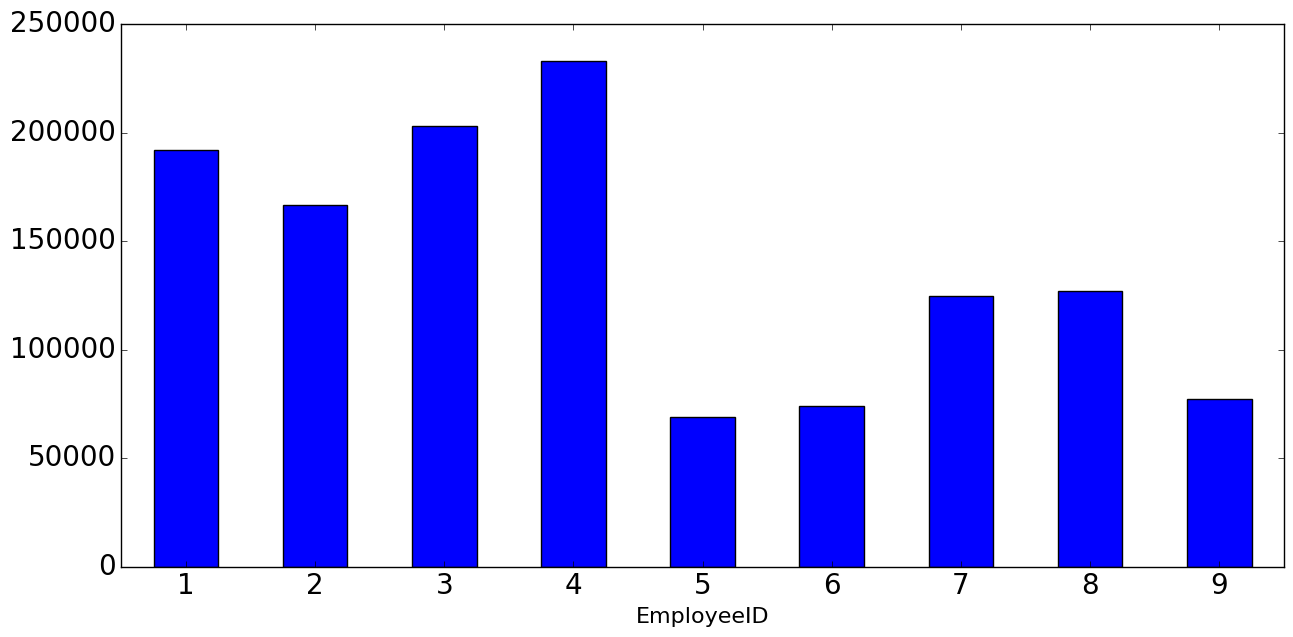

In [53]:
df5['EmployeeRev'] = (df5['UnitPrice']- (df5['UnitPrice'] * df5['Discount'])) * df5['Quantity']

df6 = pd.pivot_table(df5, index='EmployeeID', values= 'EmployeeRev', aggfunc= sum)
ax = df6.plot(kind='bar', figsize=(15,7), fontsize = 20, rot = 360)
ax.set_xlabel('EmployeeID', fontsize=16);

### Scatter Plot of Unit Price / Quantity and Color-Code by Employee

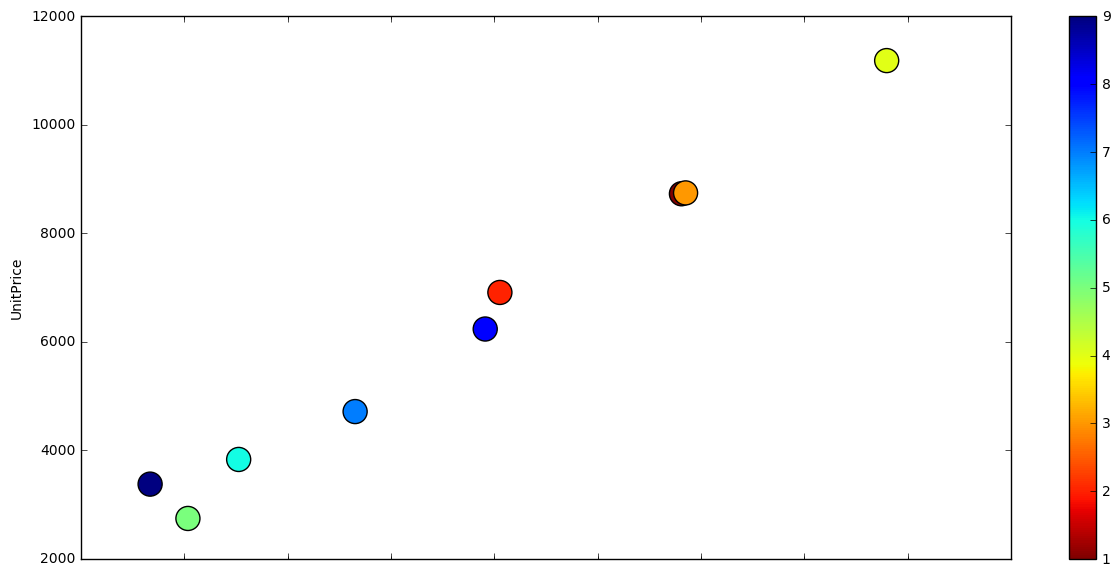

In [93]:
df7 = pd.pivot_table(df5, index='EmployeeID', values= ['UnitPrice', 'Quantity'], aggfunc= sum)

df7.plot(x='Quantity', y='UnitPrice', kind='scatter', color= df7.index, cmap='jet_r',\
        figsize=(15,7), s=300)



### 2) Total Volume of Products Shipped by Month

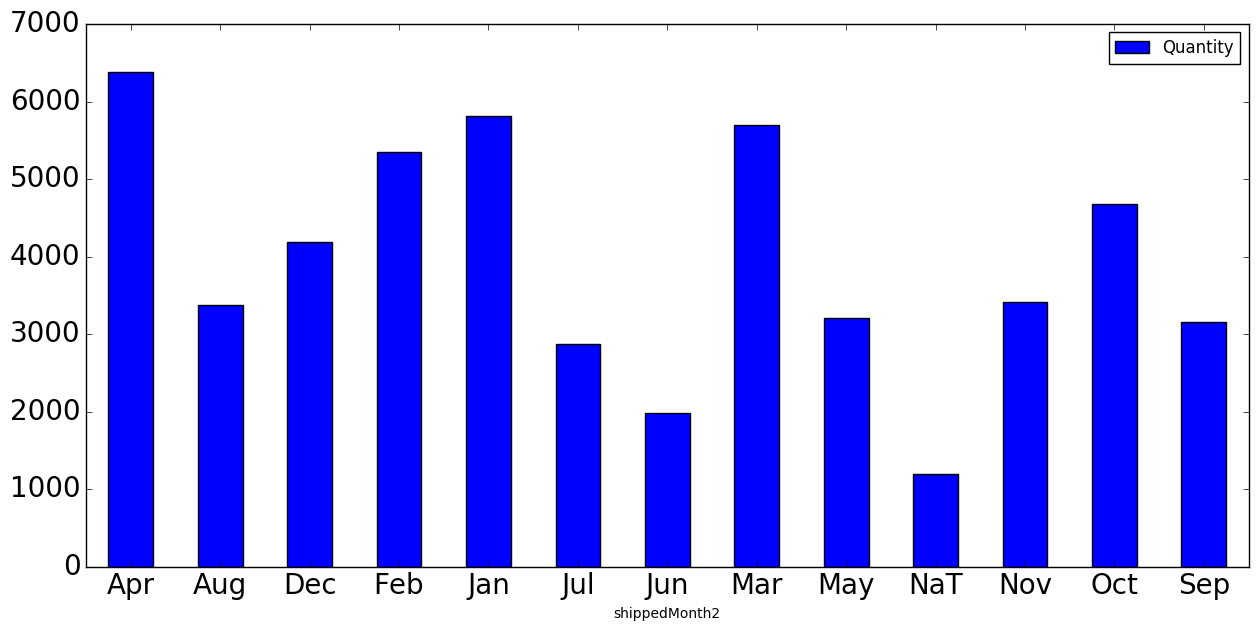

In [118]:
df5['newdate']= pd.to_datetime(df5['ShippedDate'])
df5['shippedMonth'] = df5['newdate'].dt.month
df5['shippedMonth2'] = df5['newdate'].dt.strftime('%b')
df8 = pd.pivot_table(df5, index='shippedMonth2', values= ['Quantity'], aggfunc= sum)
df8
#df8
ax = df8.plot(kind='bar', figsize=(15,7), fontsize = 20, rot = 360)

### 3) Histogram of the Number of Days Taken to Ship

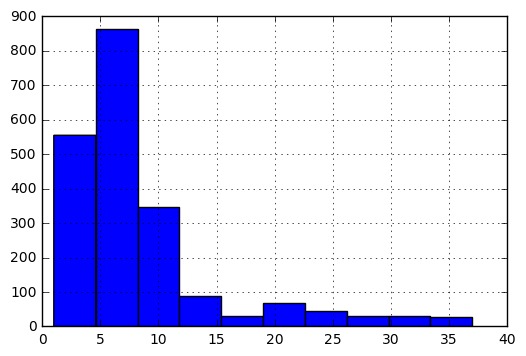

In [142]:
df5['daystoship']= (df5['ShippedDate'] -df5['OrderDate']).astype('timedelta64[D]')
#df5.info()
df5['ShipCountry'].unique()
df5['daystoship'].hist()

### Distributions for USA and UK 

/Users/Guillermo/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


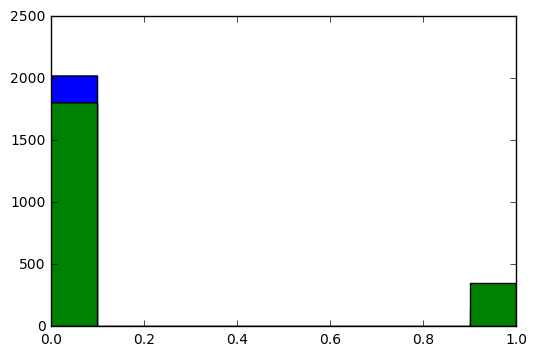

In [155]:
df10 = df5[(df5['ShipCountry'].str.contains('USA'))\
          |(df5['ShipCountry'].str.contains('UK'))]
df11 = df5[['ShipCountry', 'daystoship']]
df12= df11['ShipCountry'].str.contains('USA')
df13= df11['ShipCountry'].str.contains('UK')
plt.hist(df13)
plt.hist(df12)
plt.legend(loc='upper right')
plt.show()

### 4) Plot the daily revenues over time (by Order Date)